<h1>IMPORTING DATASET AND MOUNTING DRIVE</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content

Mounted at /content/gdrive
/content


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
token = {"username":"darkangel24","key":"141b363f52c1ebe770b120c3047cec0e"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bhaskar2443053/fashion-small
!unzip fashion-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: fashion_small/resized_images/58129.jpg  
  inflating: fashion_small/resized_images/5813.jpg  
  inflating: fashion_small/resized_images/58131.jpg  
  inflating: fashion_small/resized_images/58132.jpg  
  inflating: fashion_small/resized_images/58133.jpg  
  inflating: fashion_small/resized_images/58135.jpg  
  inflating: fashion_small/resized_images/58136.jpg  
  inflating: fashion_small/resized_images/58137.jpg  
  inflating: fashion_small/resized_images/58138.jpg  
  inflating: fashion_small/resized_images/58139.jpg  
  inflating: fashion_small/resized_images/5814.jpg  
  inflating: fashion_small/resized_images/58140.jpg  
  inflating: fashion_small/resized_images/58141.jpg  
  inflating: fashion_small/resized_images/58143.jpg  
  inflating: fashion_small/resized_images/58144.jpg  
  inflating: fashion_small/resized_images/58145.jpg  
  inflating: fashion_small/resized_images/58146.jpg  
  inflating: fashion_small/resize

In [ ]:
!rm -r /content/sample_data
!rm /content/fashion-small.zip
!rm -r /content/fashion_small/fashion_small

<h1>IMPORTING LIBRARIES</h1>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as ks
import tensorflow.keras.backend as K
import random
from tqdm.notebook import tqdm
import os
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb
import cv2 as cv
import matplotlib.pyplot as plt

<h1>LOADING DATASET</h1>

In [ ]:
dataset = pd.read_csv('/content/fashion_small/styles.csv', error_bad_lines=False)
df = pd.DataFrame(dataset)
df.reset_index(drop=True, inplace=True)
df.columns = ['id', 'gender', 'master', 'sub', 'article', 'color', 'season', 'year', 'usage', 'name']
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

,id,gender,master,sub,article,color,season,year,usage,name
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


<h1>CONVERTING IDS TO FULL PATH</h1>

In [ ]:
df['id'] = '/content/fashion_small/resized_images/' + df['id'].astype(str) + '.jpg'
df.head()

,id,gender,master,sub,article,color,season,year,usage,name
0,/content/fashion_small/resized_images/15970.jpg,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,/content/fashion_small/resized_images/39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,/content/fashion_small/resized_images/59263.jpg,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,/content/fashion_small/resized_images/21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,/content/fashion_small/resized_images/53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


<h1>REMOVING IRRELEVANT COLUMNS</h1>

In [ ]:
df = df.drop(columns=['year', 'name'])
df.head()

,id,gender,master,sub,article,color,season,usage
0,/content/fashion_small/resized_images/15970.jpg,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,/content/fashion_small/resized_images/39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
2,/content/fashion_small/resized_images/59263.jpg,Women,Accessories,Watches,Watches,Silver,Winter,Casual
3,/content/fashion_small/resized_images/21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,/content/fashion_small/resized_images/53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


<h1>CHECKING FOR MISSING VALUES</h1>

In [ ]:
df.isna().sum()

id           0
gender       0
master       0
sub          0
article      0
color       15
season      21
usage      317
dtype: int64

<h1>CONVERTING MISSING ROWS TO TEST DATAFRAME</h1>

In [ ]:
def create_test_dataframe(dataframe):
    id = []
    gender = []
    master = []
    sub = []
    article = []
    color = []
    season = []
    usage = []

    for i, row in dataframe.iterrows():
        is_null = row.isna()
        if is_null.any():
            id.append(dataframe['id'][i])
            gender.append(dataframe['gender'][i])
            master.append(dataframe['master'][i])
            sub.append(dataframe['sub'][i])
            article.append(dataframe['article'][i])
            color.append(dataframe['color'][i])
            season.append(dataframe['season'][i])
            usage.append(dataframe['usage'][i])
            dataframe = dataframe.drop(index=i)

    test_dataframe = pd.DataFrame({'id': id,
                                   'gender': gender,
                                   'master': master,
                                   'sub': sub,
                                   'article': article,
                                   'color': color,
                                   'season': season,
                                   'usage': usage})

    test_dataframe.reset_index(drop=True, inplace=True)
    dataframe.reset_index(drop=True, inplace=True)

    return dataframe, test_dataframe

df, test_df = create_test_dataframe(df)
test_df.head()

,id,gender,master,sub,article,color,season,usage
0,/content/fashion_small/resized_images/56489.jpg,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,NaN
1,/content/fashion_small/resized_images/52029.jpg,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,NaN
2,/content/fashion_small/resized_images/5402.jpg,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,Sports
3,/content/fashion_small/resized_images/55001.jpg,Women,Personal Care,Lips,Lipstick,Pink,Spring,NaN
4,/content/fashion_small/resized_images/57563.jpg,Women,Personal Care,Lips,Lipstick,Brown,Spring,NaN


In [ ]:
test_df.isna().sum()

id           0
gender       0
master       0
sub          0
article      0
color       15
season      21
usage      317
dtype: int64

In [ ]:
df.isna().sum()

id         0
gender     0
master     0
sub        0
article    0
color      0
season     0
usage      0
dtype: int64

<h1>DISPLAYING IMAGES AND RESPECTIVE LABELS</h1>

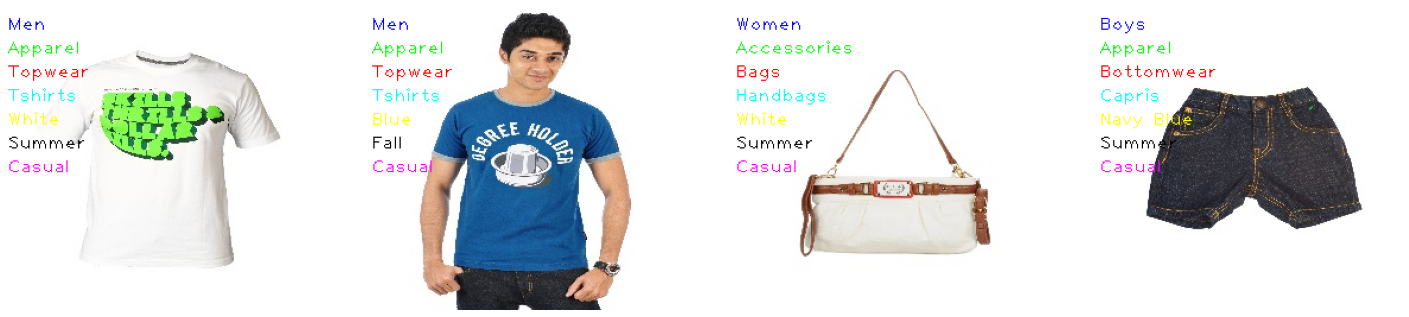

In [ ]:
def display_images_and_labels(dataframe, n):
    fig, ax = plt.subplots(1, n, figsize=(25, 25))
    for i in range(n):
        index = random.randint(0, dataframe.shape[0] - 1)
        img_path = dataframe['id'][index]
        gender = dataframe['gender'][index]
        master = dataframe['master'][index]
        sub = dataframe['sub'][index]
        article = dataframe['article'][index]
        color = dataframe['color'][index]
        seasons = dataframe['season'][index]
        usage = dataframe['usage'][index]
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.putText(img, gender, (0, 20), cv.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)
        img = cv.putText(img, master, (0, 40), cv.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 1)
        img = cv.putText(img, sub, (0, 60), cv.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)
        img = cv.putText(img, article, (0, 80), cv.FONT_HERSHEY_PLAIN, 1, (0, 255, 255), 1)
        img = cv.putText(img, color, (0, 100), cv.FONT_HERSHEY_PLAIN, 1, (255, 255, 0), 1)
        img = cv.putText(img, seasons, (0, 120), cv.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 1)
        img = cv.putText(img, usage, (0, 140), cv.FONT_HERSHEY_PLAIN, 1, (255, 0, 255), 1)
        ax[i].imshow(img)
        ax[i].axis('off')
display_images_and_labels(df, 4)

<h1>REPLACING, GETTING AND PLOTTING UNIQUE VALUE VS COUNT IN EACH COLUMN</h1>

In [ ]:
def plot_bar_graph_of_unique_quantities(dataframe, col):
    data = dict(dataframe[col].value_counts())
    courses = list(data.keys())
    values = list(data.values())
    fig = plt.figure(figsize = (20, 10))
    plt.bar(courses, values, color ='green', width = 0.4)
    plt.ylabel("COUNT")
    plt.xlabel(col)
    plt.title(f"COUNT VS {col}")
    plt.show()

In [ ]:
def get_error_dict(dataframe, col):
    error_dict = dict(df[col].value_counts())
    for i in error_dict:
        error_dict[i] = error_dict[i] / dataframe.shape[0]
    return error_dict

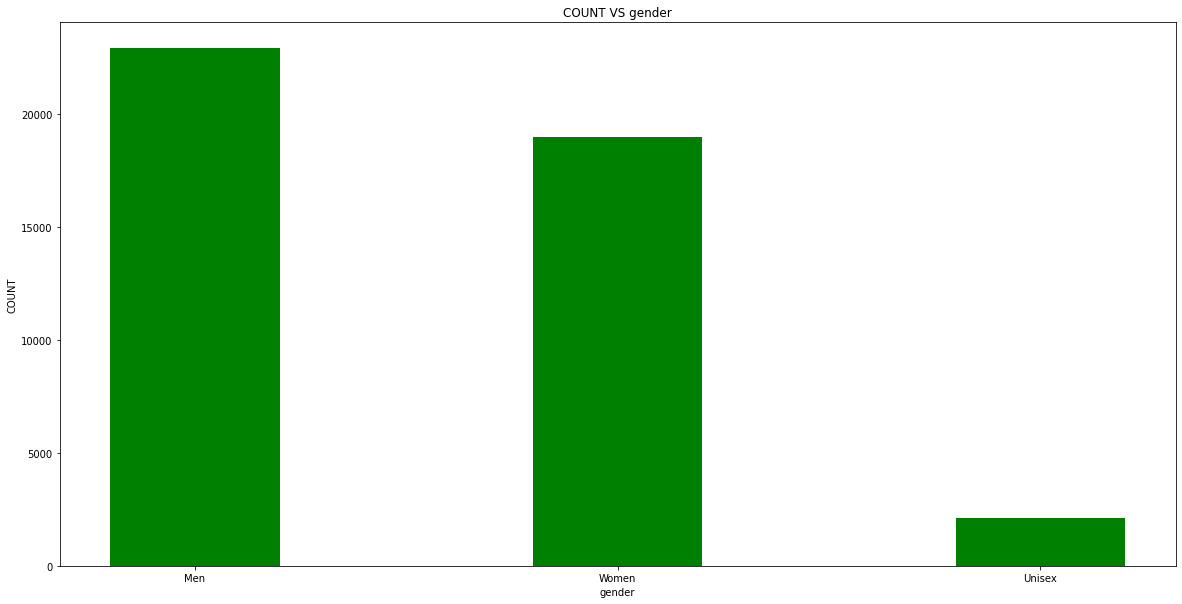

In [ ]:
df['gender'] = df['gender'].replace({'Boys': 'Men', 'Girls': 'Women'})
gender_dict = get_error_dict(df, 'gender')
plot_bar_graph_of_unique_quantities(df, 'gender')

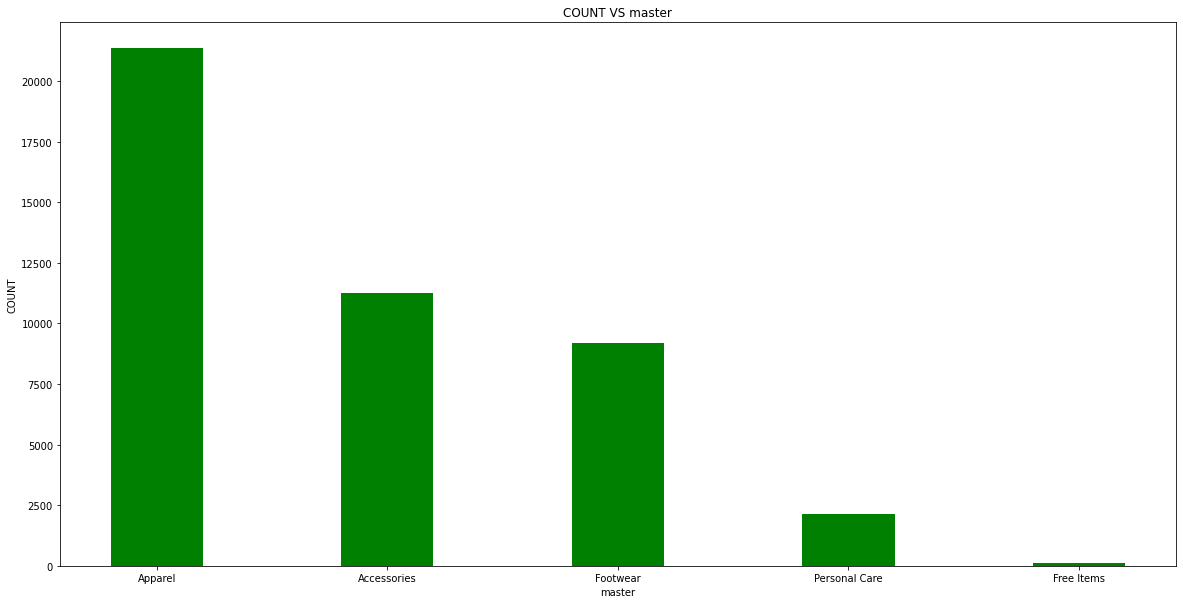

In [ ]:
df['master'] = df['master'].replace({'Home': 'Free Items', 'Sporting Goods': 'Free Items'})
master_dict = get_error_dict(df, 'master')
plot_bar_graph_of_unique_quantities(df, 'master')

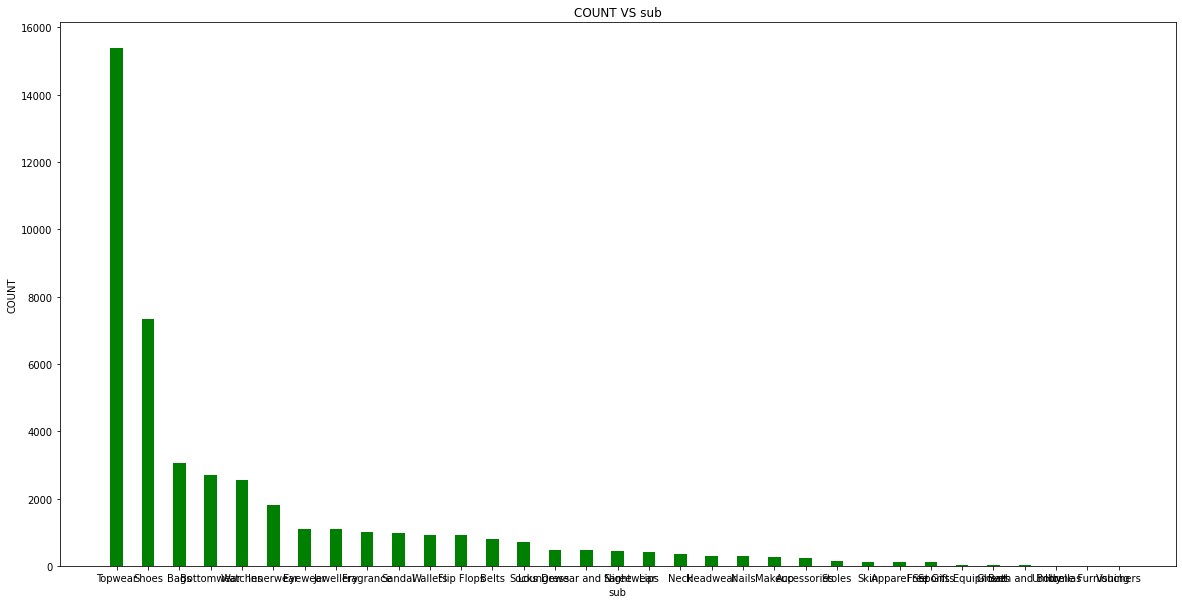

In [ ]:
df['sub'] = df['sub'].replace({'Beauty Accessories': 'Makeup',
                               'Mufflers': 'Stoles',
                               'Hair': 'Bath and Body',
                               'Skin Care': 'Skin',
                               'Wristbands': 'Watches',
                               'Shoe Accessories': 'Shoes',
                               'Sports Accessories': 'Sports Equipment',
                               'Water Bottle': 'Accessories',
                               'Perfumes': 'Fragrance',
                               'Cufflinks': 'Accessories',
                               'Scarves': 'Stoles',
                               'Ties': 'Neck',
                               'Stoles': 'Neck',
                               'Eyes': 'Eyewear',
                               'Bath and Body': 'Skin'})
sub_dict = get_error_dict(df, 'sub')
plot_bar_graph_of_unique_quantities(df, 'sub')

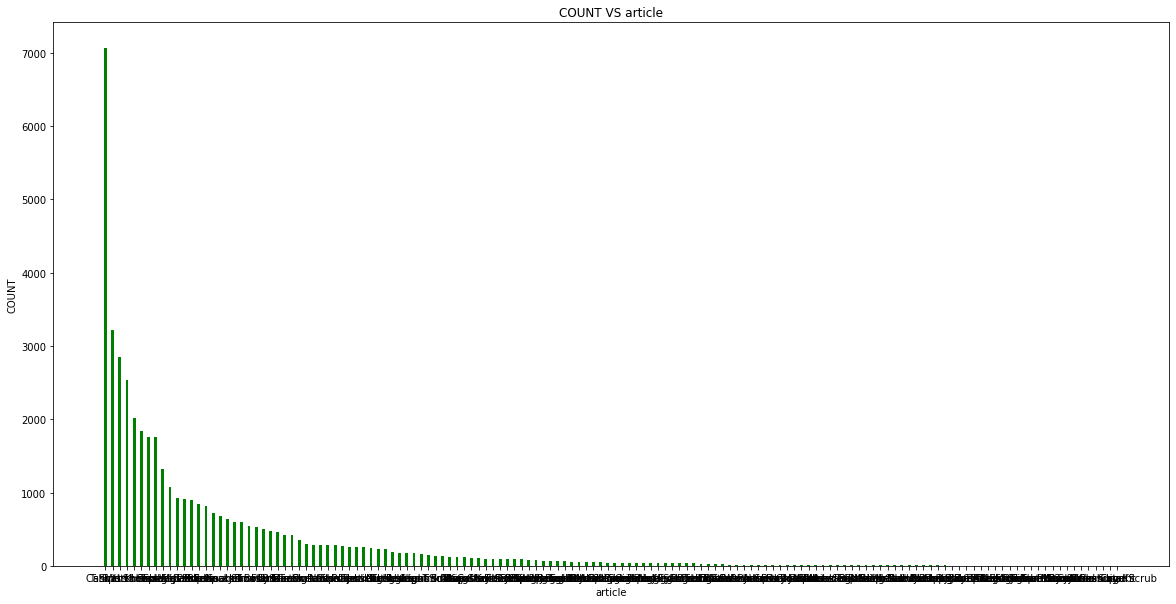

In [ ]:
dict(df['article'].value_counts())
article_dict = get_error_dict(df, 'article')
plot_bar_graph_of_unique_quantities(df, 'article')

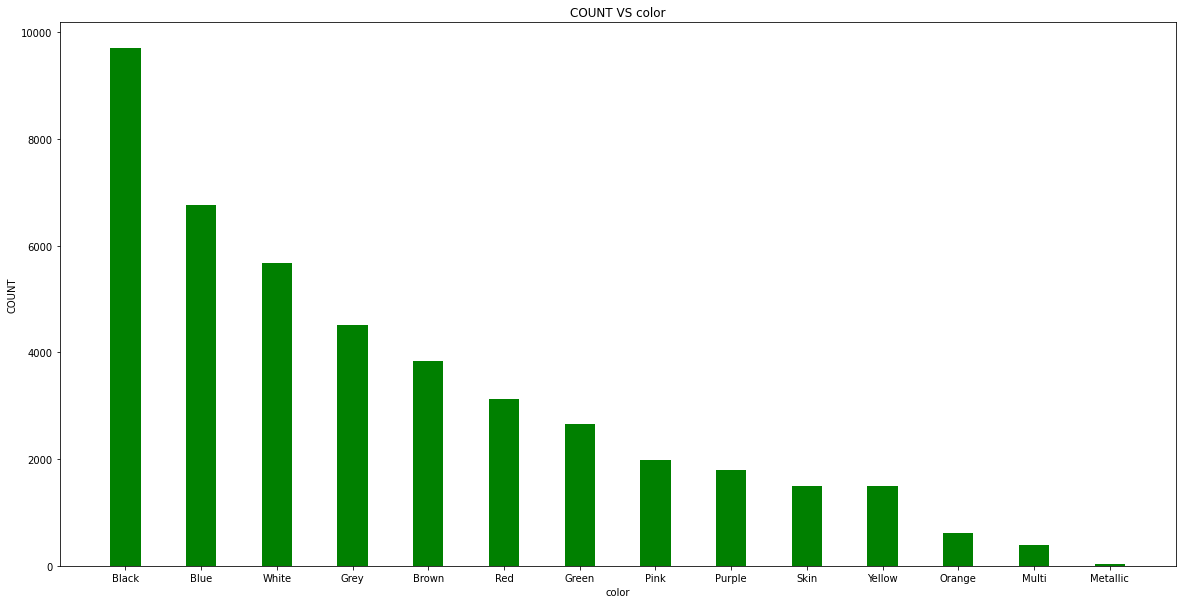

In [ ]:
df['color'] = df['color'].replace({'Coffee Brown': 'Brown',
                                   'Fluorescent Green': 'Green',
                                   'Grey Melange': 'Grey',
                                   'Lime Green': 'Green',
                                   'Mushroom Brown': 'Brown',
                                   'Navy Blue': 'Blue',
                                   'Off White': 'White',
                                   'Turquoise Blue': 'Blue',
                                   'Gold': 'Yellow',
                                   'Olive': 'Green',
                                   'Nude': 'Skin',
                                   'Beige': 'Skin',
                                   'Tan': 'Brown',
                                   'Taupe': 'Brown',
                                   'Steel': 'Grey',
                                   'Silver': 'Grey',
                                   'Sea Green': 'Green',
                                   'Rust': 'Red',
                                   'Rose': 'Pink',
                                   'Peach': 'Skin',
                                   'Mustard': 'Yellow',
                                   'Mauve': 'Purple',
                                   'Maroon': 'Red',
                                   'Magenta': 'Pink',
                                   'Lavender': 'Purple',
                                   'Khaki': 'Brown',
                                   'Cream': 'Skin',
                                   'Copper': 'Brown',
                                   'Charcoal': 'Grey',
                                   'Burgundy': 'Red',
                                   'Bronze': 'Orange',
                                   'Teal': 'Green'})
color_dict = get_error_dict(df, 'color')
plot_bar_graph_of_unique_quantities(df, 'color')

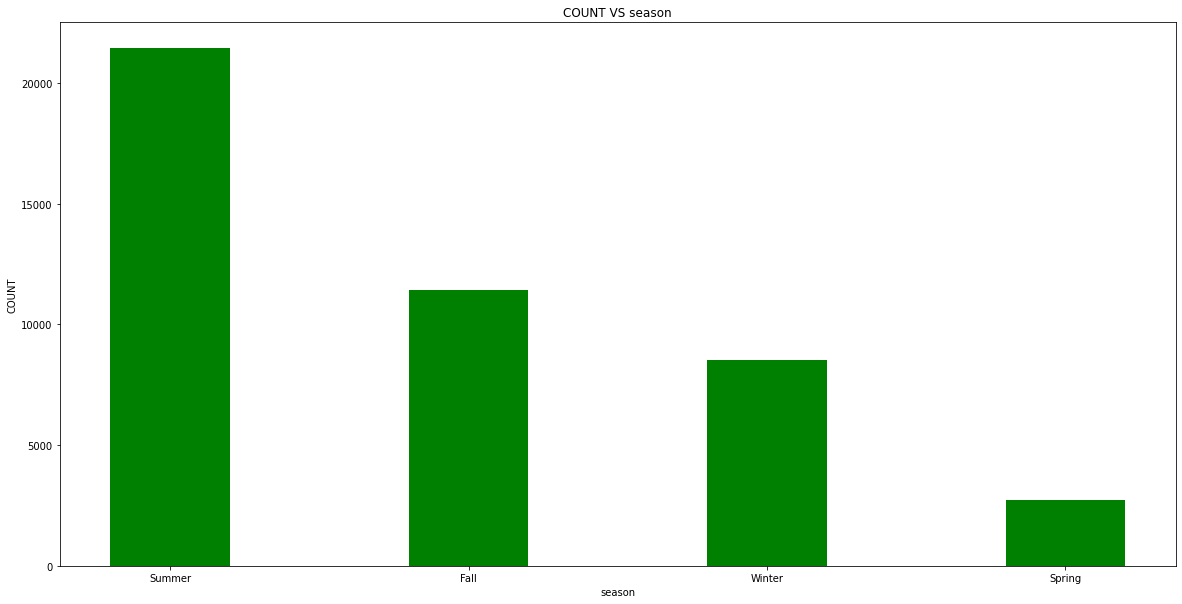

In [ ]:
season_dict = get_error_dict(df, 'season')
plot_bar_graph_of_unique_quantities(df, 'season')

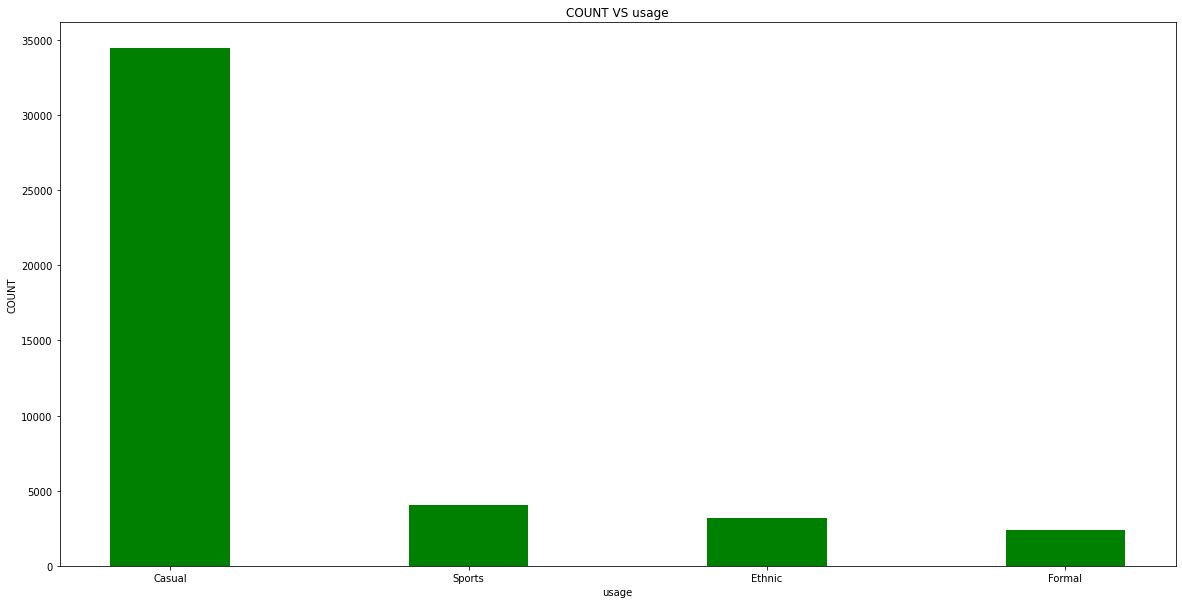

In [ ]:
df['usage'] = df['usage'].replace({'Home': 'Casual', 'Smart Casual': 'Casual', 'Travel': 'Sports', 'Party': 'Formal'})
usage_dict = get_error_dict(df, 'usage')
plot_bar_graph_of_unique_quantities(df, 'usage')

In [ ]:
df.head()

,id,gender,master,sub,article,color,season,usage
0,/content/fashion_small/resized_images/15970.jpg,Men,Apparel,Topwear,Shirts,Blue,Fall,Casual
1,/content/fashion_small/resized_images/39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
2,/content/fashion_small/resized_images/59263.jpg,Women,Accessories,Watches,Watches,Grey,Winter,Casual
3,/content/fashion_small/resized_images/21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,/content/fashion_small/resized_images/53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


<h1>ENCODING LABELS</h1>

In [ ]:
def get_unique_count_in_each_column(dataframe):
    unique_dict = {}
    for col in dataframe.columns:
        if col == 'id':
            pass
        else:
            unique = len(dict(dataframe[col].value_counts()))
            unique_dict[col] = unique
    return unique_dict
unique_value_dict = get_unique_count_in_each_column(df)
unique_value_dict

{'article': 142,
 'color': 14,
 'gender': 3,
 'master': 5,
 'season': 4,
 'sub': 33,
 'usage': 4}

In [ ]:
def encode_labels(dataframe, col):
    encoder = LabelEncoder()
    dataframe[col] = encoder.fit_transform(dataframe[col])
    return dataframe, encoder
df, gender_enc = encode_labels(df, 'gender')
df, master_enc = encode_labels(df, 'master')
df, sub_enc = encode_labels(df, 'sub')
df, article_enc = encode_labels(df, 'article')
df, color_enc = encode_labels(df, 'color')
df, season_enc = encode_labels(df, 'season')
df, usage_enc = encode_labels(df, 'usage')
df.head()

,id,gender,master,sub,article,color,season,usage
0,/content/fashion_small/resized_images/15970.jpg,0,1,28,103,1,0,0
1,/content/fashion_small/resized_images/39386.jpg,0,1,5,56,1,2,0
2,/content/fashion_small/resized_images/59263.jpg,2,0,32,139,4,3,0
3,/content/fashion_small/resized_images/21379.jpg,0,1,5,127,0,0,0
4,/content/fashion_small/resized_images/53759.jpg,0,1,28,133,4,2,0


<h1>CREATING DATA PIPELINE</h1>

In [ ]:
class CustomDataGenerator(ks.utils.Sequence):
    def __init__(self, dataframe, x_col, y_col, batch_size, img_h, img_w, img_c, unique_dict):
        self.dataframe, self.batch_size = dataframe, batch_size
        self.x_col, self.y_col = x_col, y_col
        self.img_h, self.img_w, self.img_c = img_h, img_w, img_c
        self.unique_dict = unique_dict

    def __len__(self):
        return math.floor(self.dataframe.shape[0] / self.batch_size)

    def on_epoch_end(self):
        self.dataframe = self.dataframe.sample(frac=1)

    def __getitem__(self, index):
        X = np.empty(shape=(self.batch_size, self.img_h, self.img_w, self.img_c), dtype='float32')
        Y = np.empty(shape=(self.batch_size, 205), dtype='float32')
        for i in range(self.batch_size):
            img_path = self.dataframe[self.x_col][i + (self.batch_size * index)]
            try:
                img = cv.imread(img_path)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = cv.resize(img, (self.img_w, self.img_h))
                img = np.array(img, dtype='float32')
                img = img.reshape(-1, self.img_h, self.img_w, self.img_c)
                img = img / 255.
                X[i, :, :, :] = img

                gender = self.dataframe['gender'][i + (self.batch_size * index)]
                gender = ks.utils.to_categorical(gender, num_classes=3, dtype='int32')
                Y[i, 0:3] = gender

                master = self.dataframe['master'][i + (self.batch_size * index)]
                master = ks.utils.to_categorical(master, num_classes=5, dtype='float32')
                Y[i, 3:8] = master

                sub = self.dataframe['sub'][i + (self.batch_size * index)]
                sub = ks.utils.to_categorical(sub, num_classes=33, dtype='float32')
                Y[i, 8:41] = sub

                article = self.dataframe['article'][i + (self.batch_size * index)]
                article = ks.utils.to_categorical(article, num_classes=142, dtype='float32')
                Y[i, 41:183] = article

                color = self.dataframe['color'][i + (self.batch_size * index)]
                color = ks.utils.to_categorical(color, num_classes=14, dtype='float32')
                Y[i, 183:197] = color

                season = self.dataframe['season'][i + (self.batch_size * index)]
                season = ks.utils.to_categorical(season, num_classes=4, dtype='float32')
                Y[i, 197:201] = season

                usage = self.dataframe['usage'][i + (self.batch_size * index)]
                usage = ks.utils.to_categorical(usage, num_classes=4, dtype='float32')
                Y[i, 201:] = usage
            except Exception as e:
                pass

        return X, Y

<h1>GETTING IMAGE DIMENSIONS</h1>

In [ ]:
h, w, c = cv.imread(df['id'][random.randint(0, df.shape[0] - 1)]).shape
h, w, c

(256, 256, 3)

<h1>CREATING DATA GENERATORS FROM DATAFRAMES</h1>

In [ ]:
bsize = 32
y = list(df.columns)
y.remove('id')
train_gen = CustomDataGenerator(dataframe=df,
                                x_col='id',
                                y_col=y,
                                batch_size=bsize,
                                img_h=h,
                                img_w=w,
                                img_c=c,
                                unique_dict=unique_value_dict)
train_gen.__getitem__(0)[0].shape, train_gen.__getitem__(0)[1].shape

((32, 256, 256, 3), (32, 205))

<h1>CREATING MODEL ARCHITECTURE</h1>

In [ ]:
input_shape = (h, w, c)
X_input = ks.layers.Input(shape=input_shape, batch_size=bsize)

base = ks.applications.ResNet152(include_top=False, weights='imagenet', input_tensor=X_input)

X = ks.layers.Flatten()(base.output)

X = ks.layers.Dense(1024)(X)
X = ks.layers.Dropout(0.2)(X)
X = ks.layers.Activation('relu')(X)

X = ks.layers.Dense(512)(X)
X = ks.layers.Dropout(0.1)(X)
X = ks.layers.Activation('relu')(X)

X = ks.layers.Dense(256)(X)
X = ks.layers.Activation('relu')(X)

X = ks.layers.Dense(205)(X)
X = ks.layers.Activation('sigmoid')(X)

model = ks.Model(inputs=X_input, outputs=X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(32, 256, 256, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (32, 262, 262, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (32, 128, 128, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (32, 128, 128, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
def loss_wrapper(y_true, y_pred):
    def gender_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 0:3], y_pred[:, 0:3])

    def master_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 3:8], y_pred[:, 3:8])

    def sub_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 8:41], y_pred[:, 8:41])

    def article_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 41:183], y_pred[:, 41:183])

    def color_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 183:197], y_pred[:, 183:197])

    def season_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 197:201], y_pred[:, 197:201])

    def usage_loss(y_true, y_pred):
        return K.categorical_crossentropy(y_true[:, 201:], y_pred[:, 201:])

    loss = gender_loss(y_true, y_pred) + master_loss(y_true, y_pred) + sub_loss(y_true, y_pred) + article_loss(y_true, y_pred) + color_loss(y_true, y_pred) + season_loss(y_true, y_pred) + usage_loss(y_true, y_pred)
    return loss

In [ ]:
def gender_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 0:3], y_pred[:, 0:3])

def master_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 3:8], y_pred[:, 3:8])

def sub_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 8:41], y_pred[:, 8:41])

def article_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 41:183], y_pred[:, 41:183])

def color_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 183:197], y_pred[:, 183:197])

def season_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 197:201], y_pred[:, 197:201])

def usage_accuracy(y_true, y_pred):
    return ks.metrics.categorical_accuracy(y_true[:, 201:], y_pred[:, 201:])

In [ ]:
model.compile(optimizer=ks.optimizers.Adam(learning_rate=1e-4),
              loss=loss_wrapper,
              metrics=[gender_accuracy,
                       master_accuracy,
                       sub_accuracy,
                       article_accuracy,
                       color_accuracy,
                       season_accuracy,
                       usage_accuracy])
e = 5
es = ks.callbacks.EarlyStopping(monitor='loss', mode='min', restore_best_weights=True, patience=5)
mc = ks.callbacks.ModelCheckpoint('weights.h5', monitor='loss', mode='min', save_best_only=True)
rlrop = ks.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, mode='min')
fit = model.fit(train_gen, epochs=e, callbacks=[es, mc, rlrop])

Epoch 1/5
1377/1377 [==============================] - 1371s 978ms/step - loss: 4.5410 - gender_accuracy: 0.8815 - master_accuracy: 0.9762 - sub_accuracy: 0.8868 - article_accuracy: 0.7099 - color_accuracy: 0.4768 - season_accuracy: 0.6184 - usage_accuracy: 0.8549 - lr: 1.0000e-04
Epoch 2/5
1377/1377 [==============================] - 1350s 980ms/step - loss: 2.2818 - gender_accuracy: 0.9362 - master_accuracy: 0.9948 - sub_accuracy: 0.9729 - article_accuracy: 0.8904 - color_accuracy: 0.7365 - season_accuracy: 0.7419 - usage_accuracy: 0.9185 - lr: 1.0000e-04
Epoch 3/5
1377/1377 [==============================] - 1355s 984ms/step - loss: 1.5456 - gender_accuracy: 0.9577 - master_accuracy: 0.9965 - sub_accuracy: 0.9855 - article_accuracy: 0.9328 - color_accuracy: 0.8076 - season_accuracy: 0.8058 - usage_accuracy: 0.9446 - lr: 1.0000e-04
Epoch 4/5
1377/1377 [==============================] - 1353s 982ms/step - loss: 1.0561 - gender_accuracy: 0.9694 - master_accuracy: 0.9970 - sub_accuracy:

In [ ]:
model.save('model.hdf5')

In [ ]:
class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        y_true = tf.math.round(y_true)
        y_true = tf.math.round(y_true)
        self.y_true = y_true
        self.y_pred = y_pred

    def gender_cm(self):
        y_g_true = self.y_true[:, 0: 3]
        y_g_pred = self.y_pred[:, 0: 3]
        y_g_true = tf.math.argmax(y_g_true, axis=1)
        y_g_pred = tf.math.argmax(y_g_pred, axis=1)
        return tf.math.confusion_matrix(y_g_true, y_g_pred)

    def master_cm(self):
        y_m_true = self.y_true[:, 3: 8]
        y_m_pred = self.y_pred[:, 3: 8]
        y_m_true = tf.math.argmax(y_m_true, axis=1)
        y_m_pred = tf.math.argmax(y_m_pred, axis=1)
        return tf.math.confusion_matrix(y_m_true, y_m_pred)

    def sub_cm(self):
        y_s_true = self.y_true[:, 8: 41]
        y_s_pred = self.y_pred[:, 8: 41]
        y_s_true = tf.math.argmax(y_s_true, axis=1)
        y_s_pred = tf.math.argmax(y_s_pred, axis=1)
        return tf.math.confusion_matrix(y_s_true, y_s_pred)

    def article_cm(self):
        y_a_true = self.y_true[:, 41: 183]
        y_a_pred = self.y_pred[:, 41: 183]
        y_a_true = tf.math.argmax(y_a_true, axis=1)
        y_a_pred = tf.math.argmax(y_a_pred, axis=1)
        return tf.math.confusion_matrix(y_a_true, y_a_pred)

    def color_cm(self):
        y_c_true = self.y_true[:, 183: 197]
        y_c_pred = self.y_pred[:, 183: 197]
        y_c_true = tf.math.argmax(y_c_true, axis=1)
        y_c_pred = tf.math.argmax(y_c_pred, axis=1)
        return tf.math.confusion_matrix(y_c_true, y_c_pred)

    def season_cm(self):
        y_s_true = self.y_true[:, 197: 201]
        y_s_pred = self.y_pred[:, 197: 201]
        y_s_true = tf.math.argmax(y_s_true, axis=1)
        y_s_pred = tf.math.argmax(y_s_pred, axis=1)
        return tf.math.confusion_matrix(y_s_true, y_s_pred)

    def usage_cm(self):
        y_u_true = self.y_true[:, 201:]
        y_u_pred = self.y_pred[:, 201:]
        y_u_true = tf.math.argmax(y_u_true, axis=1)
        y_u_pred = tf.math.argmax(y_u_pred, axis=1)
        return tf.math.confusion_matrix(y_u_true, y_u_pred)

In [ ]:
gen = CustomDataGenerator(dataframe=df,
                          x_col='id',
                          y_col=y,
                          batch_size=32,
                          img_h=h,
                          img_w=w,
                          img_c=c,
                          unique_dict=unique_value_dict)
y_pred, y_true = gen.__getitem__(0)
y_pred = model.predict(y_pred)
cm = ConfusionMatrix(y_true, y_pred)
cm.gender_cm()

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[20,  0,  1],
       [ 0,  1,  0],
       [ 0,  0, 10]], dtype=int32)>

In [ ]:
cm.master_cm()

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[11,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2]], dtype=int32)>

In [ ]:
cm.sub_cm()

<tf.Tensor: shape=(33, 33), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int32)>

In [ ]:
cm.article_cm()

<tf.Tensor: shape=(140, 140), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int32)>

In [ ]:
cm.color_cm()

<tf.Tensor: shape=(13, 13), dtype=int32, numpy=
array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int32)>

In [ ]:
cm.season_cm()

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 5,  0,  3,  0],
       [ 0,  2,  0,  0],
       [ 0,  0, 15,  0],
       [ 0,  0,  1,  6]], dtype=int32)>

In [ ]:
cm.usage_cm()

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[26,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  3,  0],
       [ 1,  0,  0,  1]], dtype=int32)>

In [ ]:
from google.colab import files
files.download('/content/model.hdf5')
files.download('/content/weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1>PLOTTING METICS AND LOSS</h1>

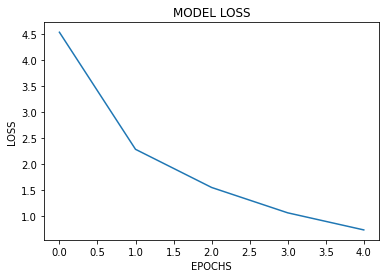

In [ ]:
plt.plot(fit.history['loss'])
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCHS')
plt.show()

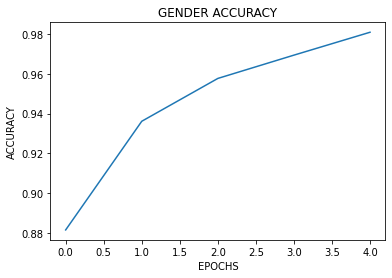

In [ ]:
plt.plot(fit.history['gender_accuracy'])
plt.title('GENDER ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

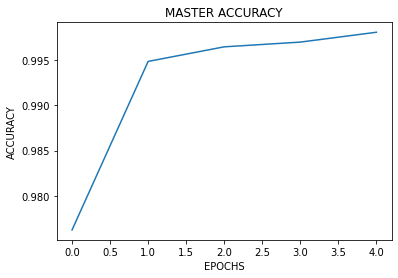

In [ ]:
plt.plot(fit.history['master_accuracy'])
plt.title('MASTER ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

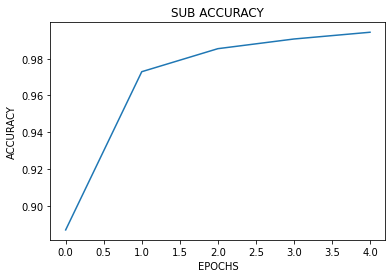

In [ ]:
plt.plot(fit.history['sub_accuracy'])
plt.title('SUB ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

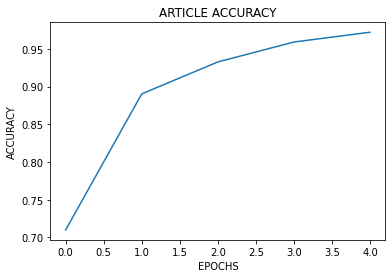

In [ ]:
plt.plot(fit.history['article_accuracy'])
plt.title('ARTICLE ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

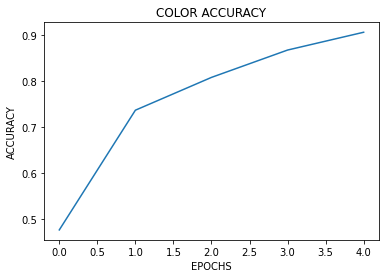

In [ ]:
plt.plot(fit.history['color_accuracy'])
plt.title('COLOR ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

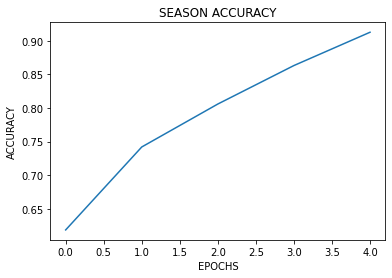

In [ ]:
plt.plot(fit.history['season_accuracy'])
plt.title('SEASON ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

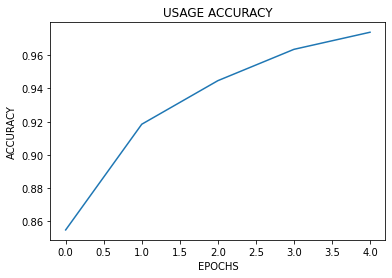

In [ ]:
plt.plot(fit.history['usage_accuracy'])
plt.title('USAGE ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.show()

<h1>TESTING OUR MODEL ON UNSEEN DATA</h1>

Women 98.51027727127075
Personal Care 97.78048992156982
Lips 95.49520015716553
Lipstick 79.23669815063477
Pink 99.94427561759949
Spring 99.84682202339172
Casual 35.64586341381073


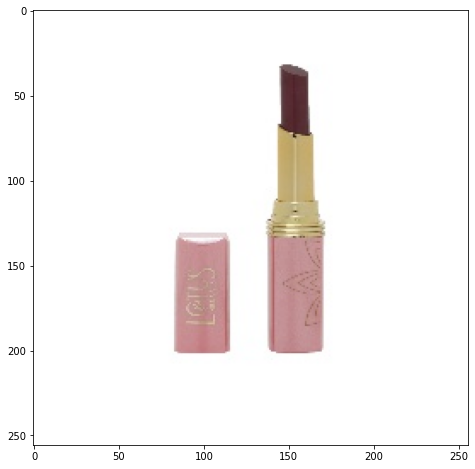

In [ ]:
h, w, c = 256, 256, 3

def get_index_and_max(prob_list):
    m = 0
    i = -1
    for ind, prob in enumerate(prob_list):
        if prob > m:
            m = prob
            i = ind
    return i, m

def test_model(dataframe):
    index = random.randint(0, dataframe.shape[0] - 1)
    img_path = dataframe['id'][index]
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (w, h))
    img_np = np.array(img, dtype='float32')
    img_np = img_np.reshape(-1, h, w, c)
    img_np = img_np / 255.
    pred = model.predict(img_np)
    pred = pred.reshape(205)
    gender_ind, gender_max = get_index_and_max(pred[0: 3])
    print(gender_enc.classes_[gender_ind], gender_max * 100)
    master_ind, master_max = get_index_and_max(pred[3: 8])
    print(master_enc.classes_[master_ind], master_max * 100)
    sub_ind, sub_max = get_index_and_max(pred[8: 41])
    print(sub_enc.classes_[sub_ind], sub_max * 100)
    article_ind, article_max = get_index_and_max(pred[41: 183])
    print(article_enc.classes_[article_ind], article_max * 100)
    color_ind, color_max = get_index_and_max(pred[183: 197])
    print(color_enc.classes_[color_ind], color_max * 100)
    season_ind, season_max = get_index_and_max(pred[197: 201])
    print(season_enc.classes_[season_ind], season_max * 100)
    usage_ind, usage_max = get_index_and_max(pred[201:])
    print(usage_enc.classes_[usage_ind], usage_max * 100)
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(img)
test_model(test_df)

Men 11.988189071416855
Personal Care 82.9792320728302
Fragrance 21.750417351722717
Perfume and Body Mist 1.590869016945362
White 46.20000422000885
Spring 96.75827622413635
Casual 39.42565321922302


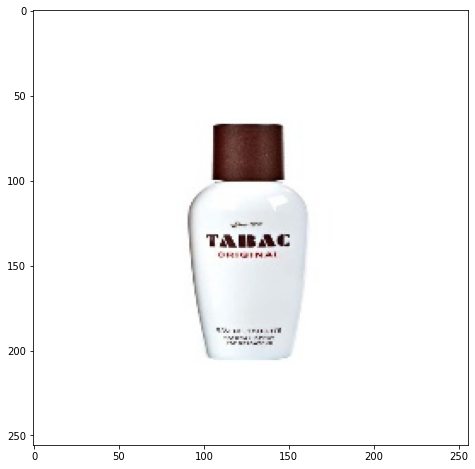

In [ ]:
test_model(test_df)

Women 94.91289854049683
Personal Care 99.98331069946289
Nails 95.23086547851562
Nail Polish 90.76827764511108
Pink 57.67068862915039
Spring 99.74204301834106
Casual 45.09607553482056


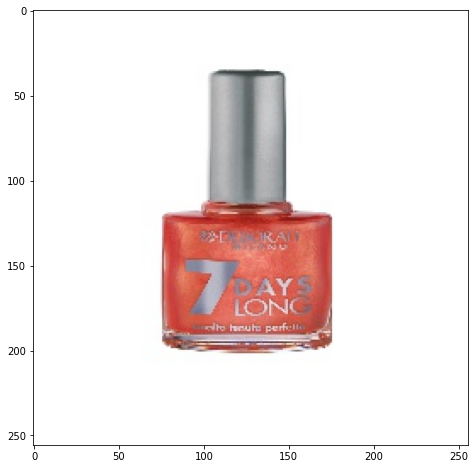

In [ ]:
test_model(test_df)

Men 48.64022433757782
Footwear 0.6244480609893799
Shoes 2.185424789786339
Sports Shoes 0.8430254645645618
Yellow 34.41438376903534
Summer 31.25748336315155
Sports 67.72951483726501


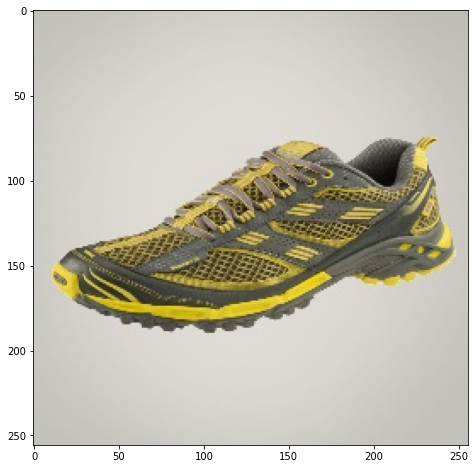

In [ ]:
test_model(test_df)

Men 89.24660682678223
Accessories 22.863289713859558
Wallets 99.61389899253845
Wallets 97.1997857093811
Black 70.23800611495972
Winter 78.11219692230225
Casual 83.38286280632019


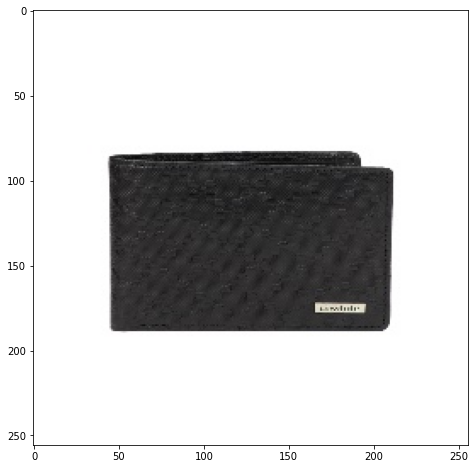

In [ ]:
test_model(test_df)

In [ ]:
import pickle as pkl
with open('/content/gender_encoder.pkl', 'wb') as f:
    pkl.dump(gender_enc, f)
with open('/content/master_encoder.pkl', 'wb') as f:
    pkl.dump(master_enc, f)
with open('/content/sub_encoder.pkl', 'wb') as f:
    pkl.dump(sub_enc, f)
with open('/content/article_encoder.pkl', 'wb') as f:
    pkl.dump(article_enc, f)
with open('/content/color_encoder.pkl', 'wb') as f:
    pkl.dump(color_enc, f)
with open('/content/season_encoder.pkl', 'wb') as f:
    pkl.dump(season_enc, f)
with open('/content/usage_encoder.pkl', 'wb') as f:
    pkl.dump(usage_enc, f)